# DSCI 100/Section 009/Group 169 Group Project Proposal

### Heart Disease Dataset Analysis Proposal
By: Shady Abo El Kasim, Nalan Goosen, Labella Li, Yusen Wu

#### Introduction

Heart disease refers to several different kinds of heart conditions with the most common one being coronary artery disease. Heart disease can be brought on by bad health habits such as smoking, it can be identified by features such as chest pain, and it may also be brought on by things outside of your control. We will attempt to find out if we can accurately predict whether or not a person has heart disease based on the characteristics of their health.

The dataset that we are using is the heart disease data set. It is sourced from the four hospitals listed below and the data was pulled on 26/10/2022. The dataset includes information about the patients including their biological information, health habits, current state of health, and whether or not they have heart disease.

Sources:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [1]:
### Please run this cell before continuing.

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(2022) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Data Reading, Wrangling, and Cleaning

In [2]:
# reading and cleaning dataset

heart_disease_data <- read_csv("https://raw.githubusercontent.com/labellali/dsci-100-2022w1-group-169/main/data/heart_disease_dataset.csv")
heart_disease_data <- heart_disease_data |>
    rename(age = Column1,
            sex = Column2,
                            chest_pain = Column3,
                            resting_blood_pressure = Column4,
                            cholesterol = Column5,
                            fasting_blood_sugar = Column6,
                            rest_ecg = Column7,
                            max_heart_rate = Column8,
                            exercised_ind_angina = Column9,
                            oldpeak = Column10,
                            slope = Column11,
                            ca = Column12,
                            thal = Column13,
                            num = Column14) |>
    mutate(sex = as.factor(sex),
          chest_pain = as.factor(chest_pain),
          fasting_blood_sugar = as.factor(fasting_blood_sugar),
          rest_ecg = as.factor(rest_ecg),
          exercised_ind_angina = as.factor(exercised_ind_angina),
          num = as.factor(num),
          thal = na_if(thal, '?'),
          thal = as.factor(thal),
          ca = na_if(ca, '?'),
          ca = as.numeric(ca))

# deciding which columns to keep; separated from the rest of the cleaning process as our decisions may change

heart_disease_data <- select(heart_disease_data,
                            age,
                            sex,
                            resting_blood_pressure,
                            cholesterol,
                            max_heart_rate,
                            num)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Column12, Column13
dbl (12): Column1, Column2, Column3, Column4, Column5, Column6, Column7, Col...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# splitting data into initial and training datasets

heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = num)
training_data <- training(heart_disease_split)
testing_data <- testing(heart_disease_split)

### Preliminary Exploratory Data Analysis

#### Data Summarization Exploration

In [4]:
# looking at the number of observations in each class to predict

training_data_count <- training_data |>
    group_by(num) |>
    summarize(n = n())

training_data_count

num,n
<fct>,<int>
0,122
1,41
2,25
3,25
4,12


In [5]:
# calculating the means of every numeric predictor

training_data_means <- training_data |>
    select(-sex, -num) |>
    map_df(mean, na.rm = TRUE)

training_data_means

age,resting_blood_pressure,cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>
54.60889,132.7644,249.4756,151.4133


In [6]:
# counting how many rows have missing data
## FIX

training_data_na_count <- training_data |>
    filter(age == is.na(age) ||
          sex == is.na(sex) ||
          resting_blood_pressure == is.na(resting_blood_pressure) ||
          max_heart_rate == is.na(max_heart_rate) ||
          num == is.na(num)) |>
    summarize(rows_with_na = n())

training_data_na_count

rows_with_na
<int>
0


In [7]:
# finding range of each numeric variable

training_data_max <- training_data |>
    select(-sex, -num) |>
    map_df(max, na.rm = TRUE)

training_data_min <- training_data |>
    select(-sex, -num) |>
    map_df(min, na.rm = TRUE)

training_data_ranges <- tibble(training_data_max - training_data_min)

training_data_ranges

age,resting_blood_pressure,cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>
48,106,438,131


In [8]:
# looking at the number of observations pertaining to categorical variables

training_data_count_sex <- training_data |>
    group_by(sex) |>
    summarize(n = n())

training_data_count_sex

sex,n
<fct>,<int>
0,78
1,147


#### Data Visualization Exploration

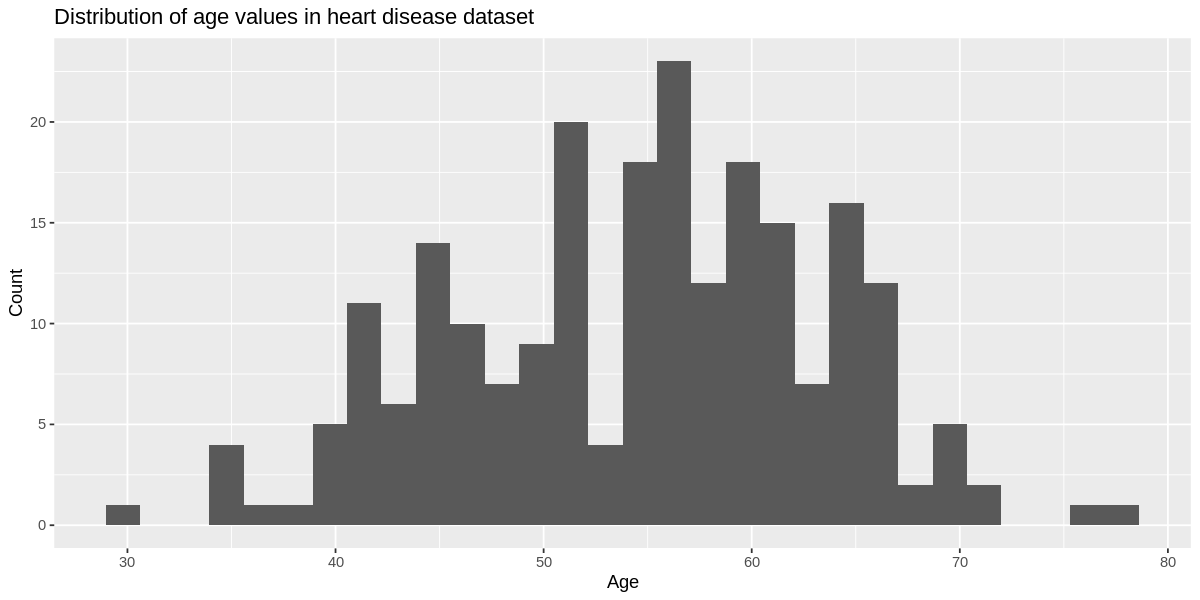

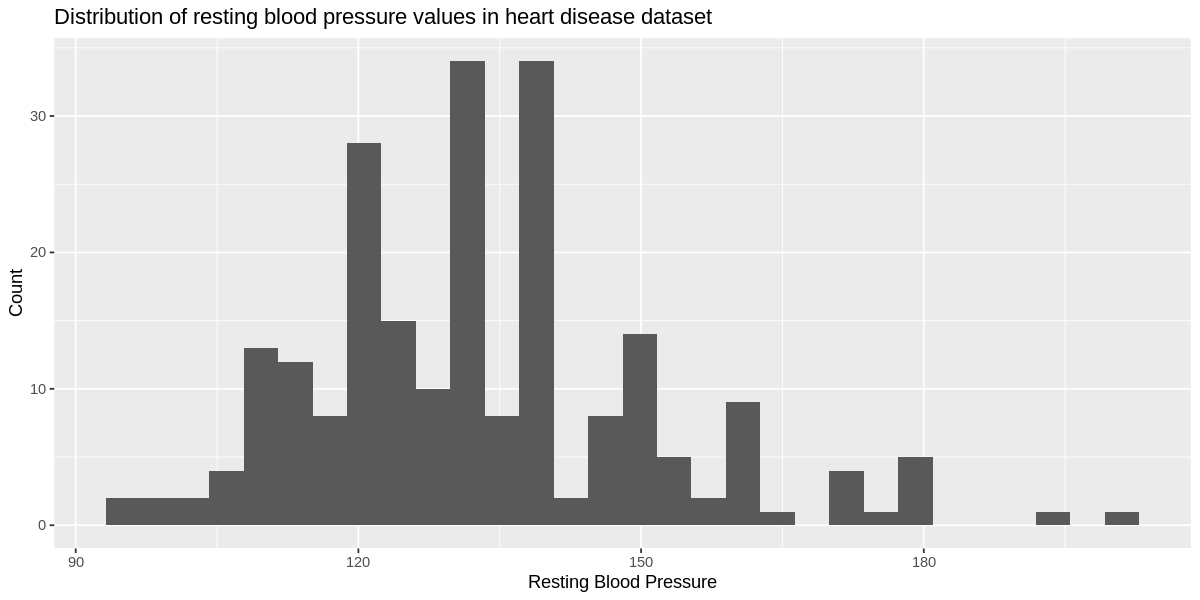

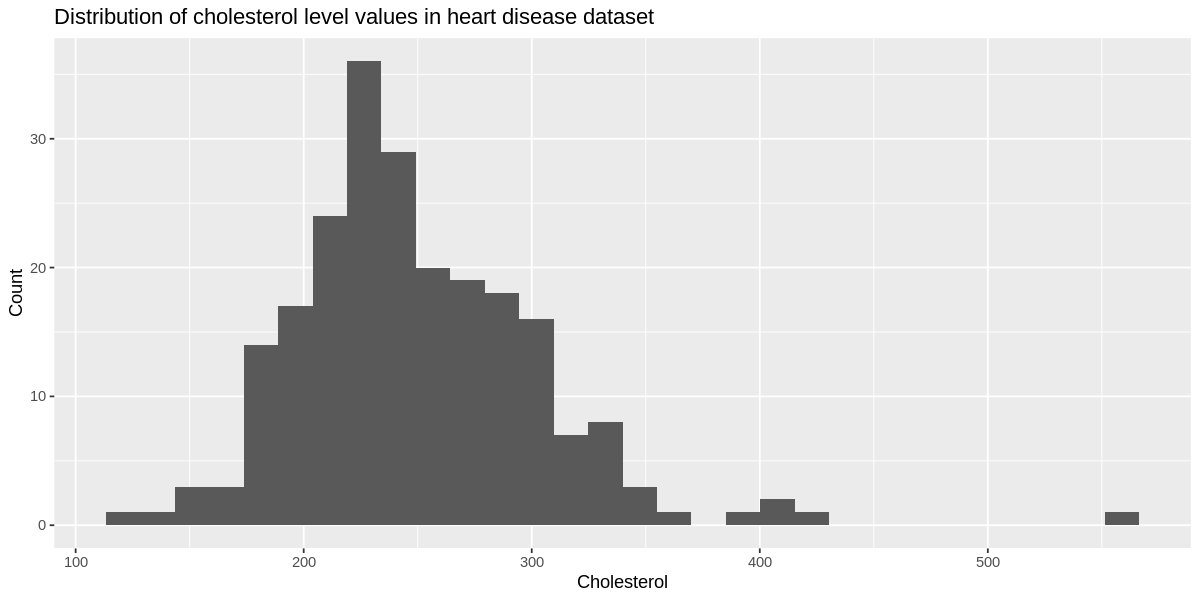

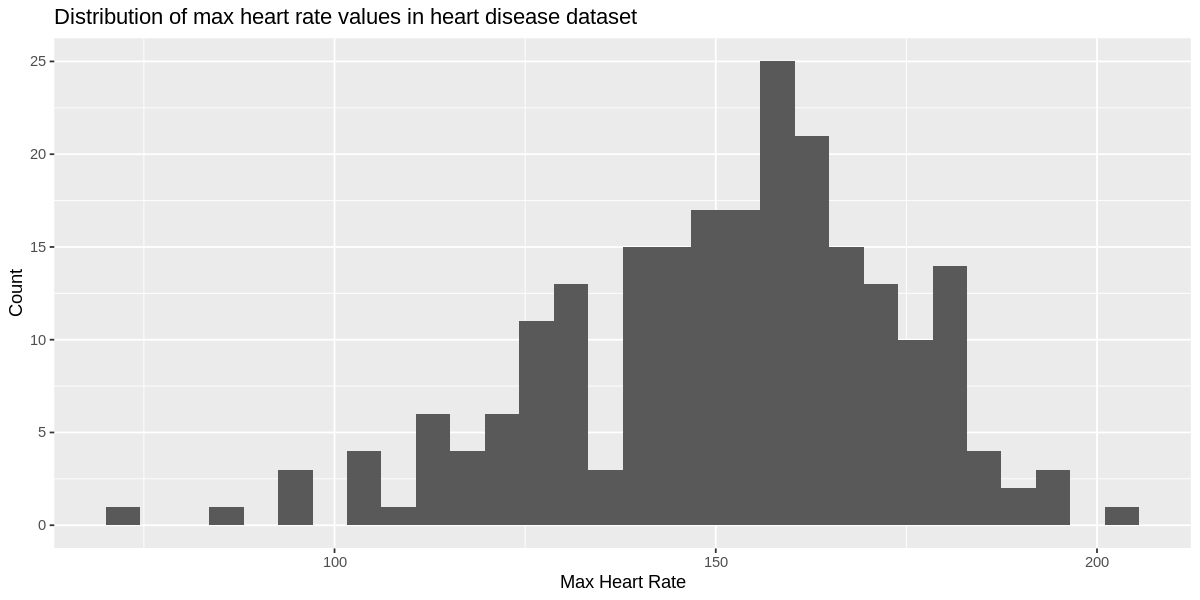

In [9]:
# histograms of every numeric variable

options(repr.plot.width=10, repr.plot.height=5)
heart_training_hist_age<- training_data %>%
    ggplot(aes(x=age))+
    geom_histogram(bins = 30)+
    labs(x = "Age", y = "Count") +
    ggtitle("Distribution of age values in heart disease dataset")
heart_training_hist_age

heart_training_hist_resting_blood_pressure<- training_data %>%
    ggplot(aes(x=resting_blood_pressure))+
    geom_histogram(bins = 30)+
    labs(x = "Resting Blood Pressure", y = "Count") +
    ggtitle("Distribution of resting blood pressure values in heart disease dataset")
heart_training_hist_resting_blood_pressure

heart_training_hist_cholesterol<- training_data %>%
    ggplot(aes(x=cholesterol))+
    geom_histogram(bins = 30)+
    labs(x = "Cholesterol", y = "Count") +
    ggtitle("Distribution of cholesterol level values in heart disease dataset")
heart_training_hist_cholesterol

heart_training_max_heart_rate<- training_data %>%
    ggplot(aes(x=max_heart_rate))+
    geom_histogram(bins = 30)+
    labs(x = "Max Heart Rate", y = "Count") +
    ggtitle("Distribution of max heart rate values in heart disease dataset")
heart_training_max_heart_rate

#### Method

* *Explain how you will conduct either your data analysis and which variables/columns you will use.*
* *Describe at least one way that you will visualize the results*
    
In our data set, there are 14 columns:

* age (years)
* sex (1 = male, 0 = female)
* chest_pain (type) Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic
* resting_blood_pressure (in mm Hg on admission to the hospital)
* cholesterol (serum cholestoral in mg/dl)
* fasting_blood_sugar (> 120 mg/dl, 1 = true; 0 = false)
* rest_ecg (resting electrocardiographic results)
* max_heart_rate (maximum heart rate achieved)
* exercised_ind_angina (exercise induced angina, 1 = yes; 0 = no)
* oldpeak (ST depression induced by exercise relative to rest)
* slope (the slope of the peak exercise ST segment) Value 1: upsloping Value 2: flat Value 3: downsloping
* ca (number of major vessels (0-3) colored by flourosopy)
* thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
* num (diagnosis of heart disease (angiographic disease status)) Value 0: < 50% diameter narrowing Value 1: > 50% diameter narrowing

We will select the columns age, sex, chest_pain, resting_blood_pressure, cholesterol, fasting_blood_pressure, max_heart_rate, and num, because these are all terms that correlate directly with the heart disease status itself and are usable in classification. We're excluding rest_ecg, exercised_ind_angina, oldpeak, slope, ca, thal, and num because they are more abstract variables and therefore the correlation between them and the disease itself is difficult to interpret. This selection criteria will help us answer our predictive quesion: can we predict heart disease based on certain variables?

One type of visualization we'll be using is a histiogram, to compare distributions of data of the same type and to see pre-existing trends. For example, using age as on the x axis, we can see the age range at which most people get heart disease.

#### Expected outcomes and significance

What do you expect to find?

  * A link between certain variables and heart disease
  * A list of variables that are linked to heart disease, and the variable that has the largest affect on the likelihood of heart disease
  * An accurate predictive model that can help detect the possibility of heart disease

What impact could such findings have?
  * Our findings would be useful for people to assess their health habits and for them to receive preventative care if they are susceptible to heart disease
  * We could pinpoint the main link and/or more relevant factors to heart disease 
  * Future medical procedures could be better adjusted acoording to the model's findings

What future questions could this lead to?

  * What is the strongest early indicator of heart disease?
  * What is the medical difference between the different types of heart disease and how are the different types brought on by different factors?
  * What measures could we take to prevent the different types of heart disease?
